In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [9]:
def func(x, a,b):
    return b/(x**a)

def toy_samp_(cv,M):
    n_genes=20000
    n_cells = 2000
    x_=np.linspace(1,n_genes, n_genes+1)
    f_mean=func(x_,0.8,1)
    fake_organ=np.zeros((n_genes,n_cells,5)).astype('float32')
    f=np.zeros((n_genes,n_cells,5)).astype('float32')
    M = np.repeat(M,n_cells)
    for z in range(3):
        for i in range(n_genes)[:]:
            mu= f_mean[i]
            std = cv * mu
            var=std**2
            shape = mu**2/var
            scale= var/mu
            if not math.isinf(shape):
                N_ =np.random.gamma(shape,scale, size=(1,n_cells))
                f[i,:,z]=N_
        rs = np.random.RandomState(seed=42)
        for c in range(n_cells)[:]:
            p = f[:,c,z]/(f[:,c,z].sum()+0.0001)
            fake_raw=np.mean(np.random.multinomial(M[c], p, size=1),axis=0) 
            fake_organ[:,c,z]= np.array(fake_raw)

    toy_samp= fake_organ
    return toy_samp

(array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

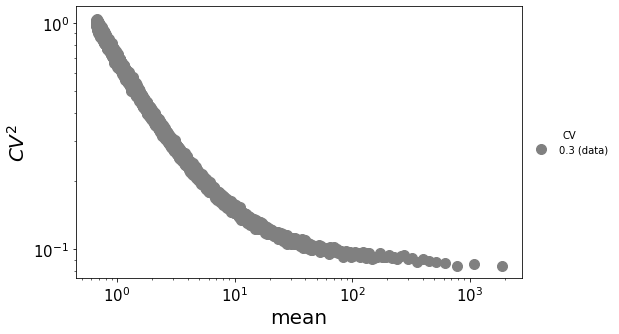

In [10]:
cv_list=[0.3]
M=100000

plt.figure(figsize=(8,5))
for cv in cv_list:   
    toy_samp=toy_samp_(cv,M)
    cv2_samp=((toy_samp.std(axis=1)).mean(axis=1))**2/((toy_samp.mean(axis=1)).mean(axis=1))**2
    if cv==0.3:
        plt.plot((toy_samp.mean(axis=1)).mean(axis=1), cv2_samp,'o', color='gray', label='{} (data)'.format(cv), ms=10)
    else:
        plt.plot((toy_samp.mean(axis=1)).mean(axis=1), cv2_samp,'o', color='gray',label=cv, ms=10)
plt.legend(title='CV',frameon=False, bbox_to_anchor=(1, .5), loc='center left')
plt.xlabel('mean',fontsize=20)
plt.ylabel('$CV^2$',fontsize=20)
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

(array([1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

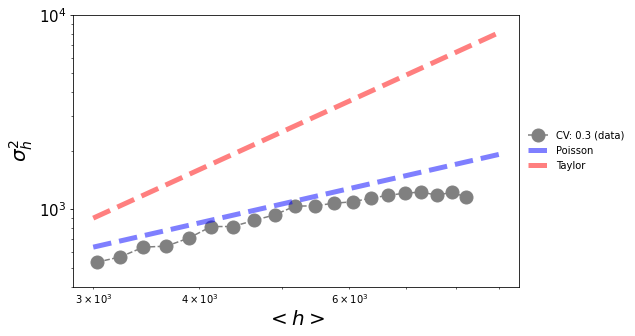

In [11]:
plt.figure(figsize=(8,5))
cv_list=[0.3]

M_list=np.logspace(np.log10(10000),np.log10(55000),20)

for idx,cv in enumerate(cv_list[:]):
    h_means = []
    h_vars=[]
    for m in M_list:
        toy_samp=toy_samp_(cv,m)
        h_toy_samp=((toy_samp>0).sum(axis=0)).mean(axis=1)
        h_mean = h_toy_samp.mean()
        h_var = h_toy_samp.var()
        h_means.append(h_mean)
        h_vars.append(h_var)
    h_means=np.array(h_means)
    h_vars=np.array(h_vars)
    if cv==0.3:
        plt.plot(h_means,h_vars,'o--', label='CV: {} (data)'.format(cv), color='gray', ms=13)
    else:
        plt.plot(h_means,h_vars,'o--', color='gray',label='CV: {}'.format(cv), ms=13)
plt.plot(np.logspace(np.log10(3*10**3),np.log10(9*10**3),100), np.logspace(np.log10(3*10**3),np.log10(9*10**3),100)*1/np.log(110),'--',color='blue',alpha=0.5,lw=5,label='Poisson')
plt.plot(np.logspace(np.log10(3*10**3),np.log10(9*10**3),100), ((np.logspace(np.log10(3*10**3),np.log10(9*10**3),100))**2)*1/10000,'--', color='red', alpha=0.5,lw=5, label='Taylor')
plt.legend(frameon=False, bbox_to_anchor=(1, .5), loc='center left')
plt.ylim(bottom=4*10**2,top=10**4)
plt.xscale('log')
plt.yscale('log')
plt.ylabel('$\sigma^2_h$',fontsize=20)
plt.xlabel('$<h>$', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)